In [101]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots 

pd.options.mode.chained_assignment = None



# read in the data

df = pd.read_csv(r'C:\Users\ACER-PC\Downloads\movies.csv\movies.csv')

In [102]:
# View Data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [103]:
# Check if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [104]:
df["rating"].fillna("Not Rated", inplace = True)

df["released"].fillna("Did not release", inplace = True)

df["score"].fillna("0", inplace = True)

df["votes"].fillna("0", inplace = True)

df["writer"].fillna("Unknown", inplace = True)

df["star"].fillna("Unknown", inplace = True)

df["country"].fillna("Unknown", inplace = True)

df["budget"].fillna("0", inplace = True)

df["gross"].fillna("0", inplace = True)

df["company"].fillna("Unknown Company", inplace = True)

df["runtime"].fillna("0", inplace = True)

In [105]:
#Show Data types for columns

df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
score       object
votes       object
director    object
writer      object
star        object
country     object
budget      object
gross       object
company     object
runtime     object
dtype: object

In [106]:
#change data type for columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

df['score'] = df['score'].astype('int64')

In [107]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,Unknown Company,90
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",0,0,James Randall,James Randall,Christina Roz,United States,15000,0,Unknown Company,120


In [108]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,Unknown Company,90
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",0,0,James Randall,James Randall,Christina Roz,United States,15000,0,Unknown Company,120


In [122]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,Not Rated,Comedy,1989,"January 13, 1990 (Japan)",7,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104


In [110]:
#check for any dupes

df['company'].sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 7668, dtype: object

In [111]:
#drop dupes code
#for all dupes
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,Unknown Company,90
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",0,0,James Randall,James Randall,Christina Roz,United States,15000,0,Unknown Company,120


In [112]:
# budget and company might have high correlation

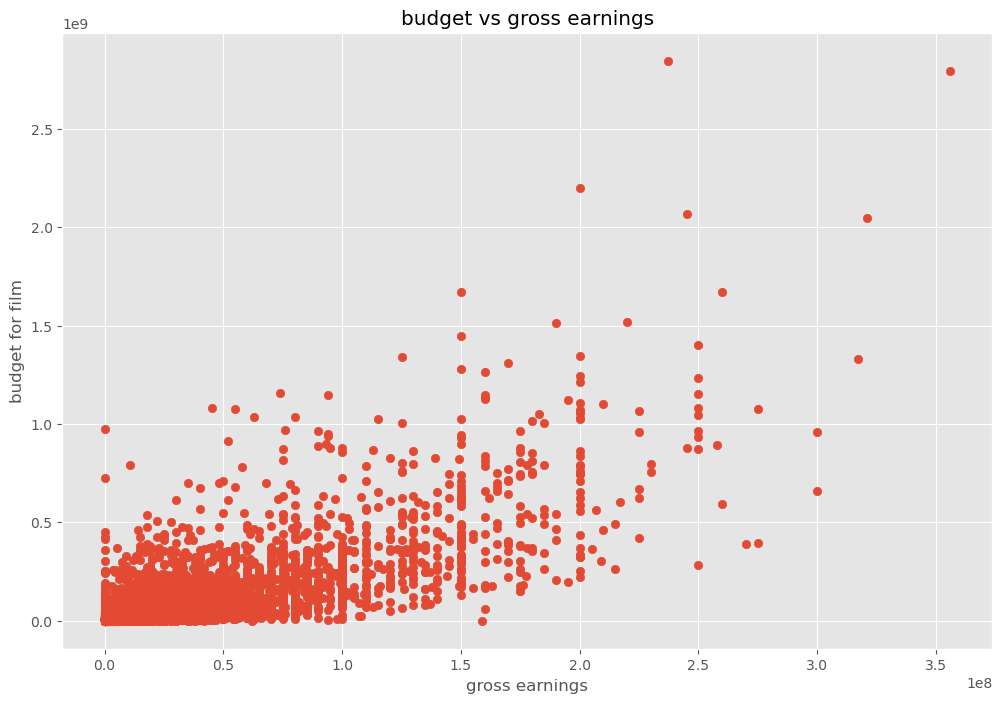

In [113]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('budget vs gross earnings')

plt.xlabel('gross earnings')

plt.ylabel('budget for film')

plt.show()

In [114]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,Unknown Company,90
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",0,0,James Randall,James Randall,Christina Roz,United States,15000,0,Unknown Company,120


In [ ]:
pd.set_option('display.max_rows',None) #show all rows/fields

In [115]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


<Axes: xlabel='budget', ylabel='gross'>

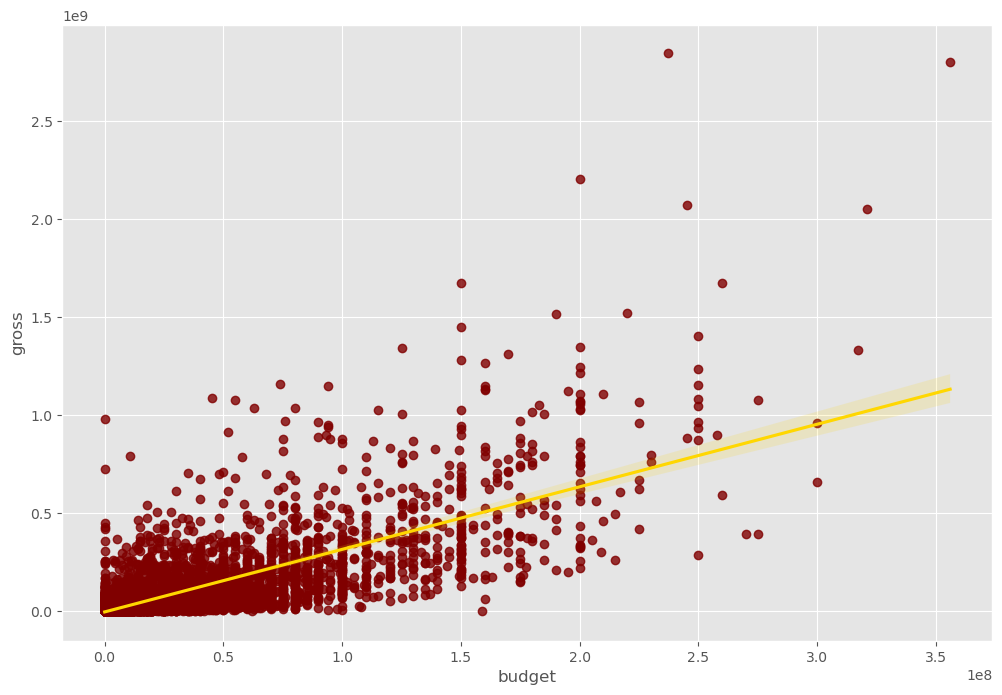

In [116]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df , scatter_kws={"color":"maroon"}, line_kws={"color":"gold"})

In [123]:
#view correlations

df.corr(numeric_only=True, method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.091429,0.222427,0.309212,0.261900,0.116358
score,0.091429,1.000000,0.391952,0.053473,0.177451,0.379436
votes,0.222427,0.391952,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.053473,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.177451,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.379436,0.306984,0.268372,0.244339,1.000000


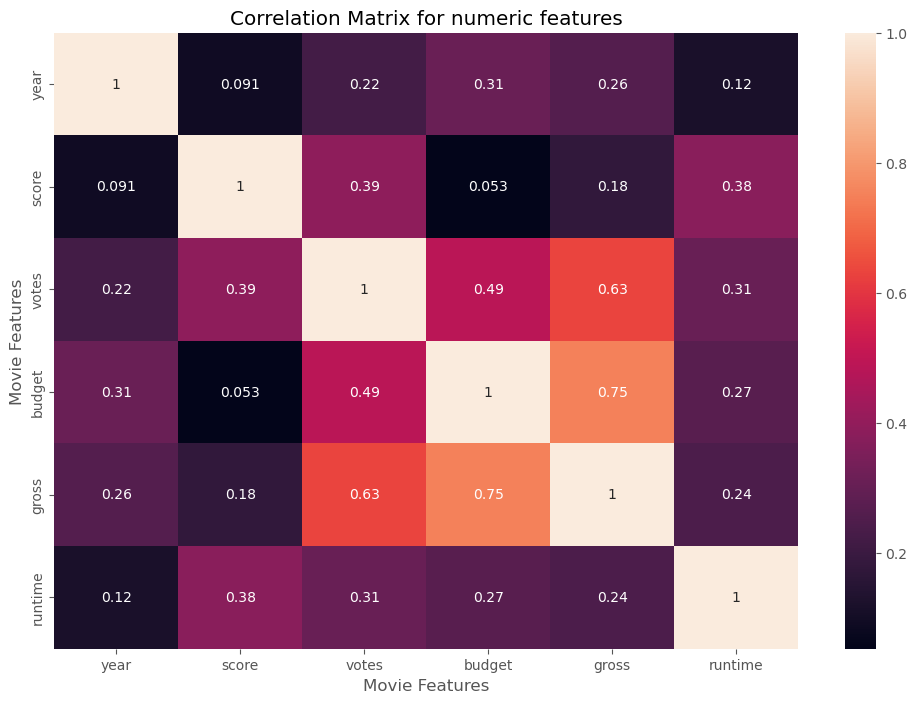

In [118]:
correlation_matrix = df.corr(numeric_only=True, method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [119]:
# look at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [ ]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

In [120]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


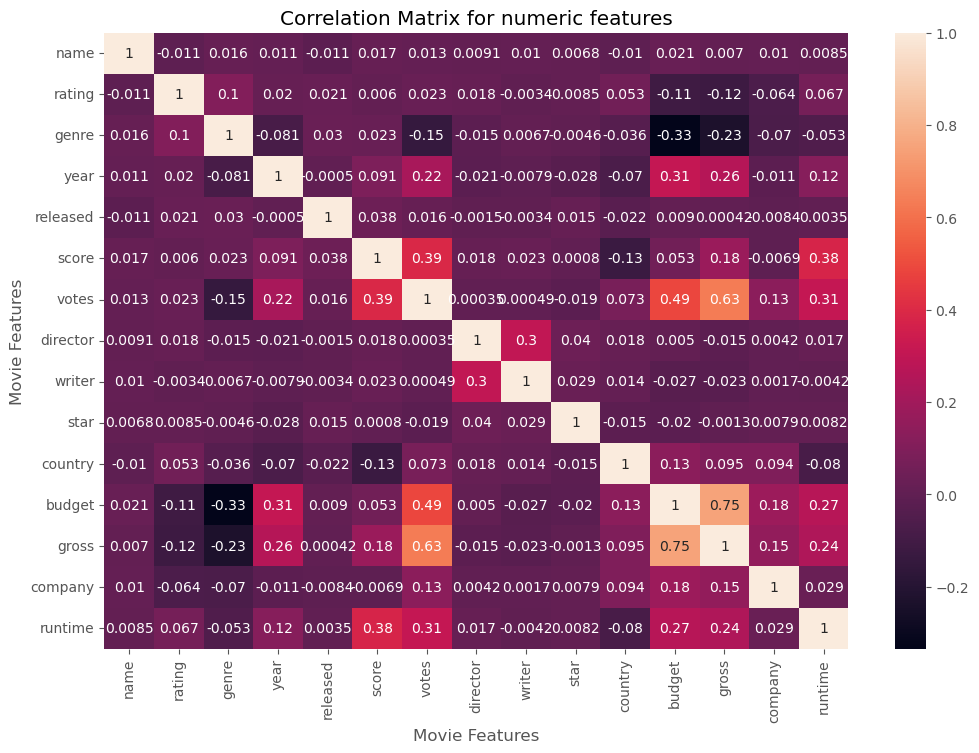

In [124]:
correlation_matrix = df_numerized.corr(numeric_only=True, method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [127]:
df_numerized.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.010860,0.016355,0.011453,-0.011102,0.017191,0.013038,0.009079,0.009985,0.006844,-0.010359,0.020548,0.006989,0.010373,0.008483
rating,-0.010860,1.000000,0.104108,0.019913,0.021315,0.005960,0.023025,0.018466,-0.003401,0.008469,0.053247,-0.112982,-0.119094,-0.064254,0.067058
genre,0.016355,0.104108,1.000000,-0.081261,0.029981,0.023134,-0.145296,-0.015258,0.006747,-0.004641,-0.035783,-0.334021,-0.234297,-0.070032,-0.052914
year,0.011453,0.019913,-0.081261,1.000000,-0.000496,0.091429,0.222427,-0.020795,-0.007930,-0.027912,-0.069590,0.309212,0.261900,-0.011425,0.116358
released,-0.011102,0.021315,0.029981,-0.000496,1.000000,0.038474,0.015902,-0.001484,-0.003422,0.015451,-0.022049,0.009000,0.000417,-0.008437,0.003514
score,0.017191,0.005960,0.023134,0.091429,0.038474,1.000000,0.391952,0.017562,0.023469,0.000799,-0.127238,0.053473,0.177451,-0.006877,0.379436
votes,0.013038,0.023025,-0.145296,0.222427,0.015902,0.391952,1.000000,0.000349,0.000487,-0.019380,0.073424,0.486931,0.632870,0.130535,0.306984
director,0.009079,0.018466,-0.015258,-0.020795,-0.001484,0.017562,0.000349,1.000000,0.299523,0.039875,0.018014,0.004976,-0.014916,0.004248,0.017062
writer,0.009985,-0.003401,0.006747,-0.007930,-0.003422,0.023469,0.000487,0.299523,1.000000,0.028887,0.014490,-0.026777,-0.022963,0.001729,-0.004213
star,0.006844,0.008469,-0.004641,-0.027912,0.015451,0.000799,-0.019380,0.039875,0.028887,1.000000,-0.015101,-0.020228,-0.001326,0.007918,0.008216


In [130]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

pd.set_option('display.max_rows',None) #show all rows/fields

corr_pairs

name      name        1.000000
          rating     -0.010860
          genre       0.016355
          year        0.011453
          released   -0.011102
          score       0.017191
          votes       0.013038
          director    0.009079
          writer      0.009985
          star        0.006844
          country    -0.010359
          budget      0.020548
          gross       0.006989
          company     0.010373
          runtime     0.008483
rating    name       -0.010860
          rating      1.000000
          genre       0.104108
          year        0.019913
          released    0.021315
          score       0.005960
          votes       0.023025
          director    0.018466
          writer     -0.003401
          star        0.008469
          country     0.053247
          budget     -0.112982
          gross      -0.119094
          company    -0.064254
          runtime     0.067058
genre     name        0.016355
          rating      0.104108
        

In [131]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.334021
genre     budget     -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
          votes      -0.145296
votes     genre      -0.145296
score     country    -0.127238
country   score      -0.127238
gross     rating     -0.119094
rating    gross      -0.119094
budget    rating     -0.112982
rating    budget     -0.112982
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.079918
runtime   country    -0.079918
company   genre      -0.070032
genre     company    -0.070032
year      country    -0.069590
country   year       -0.069590
rating    company    -0.064254
company   rating     -0.064254
genre     runtime    -0.052914
runtime   genre      -0.052914
genre     country    -0.035783
country   genre      -0.035783
year      star       -0.027912
star      year       -0.027912
writer    budget     -0.026777
budget    writer     -0.026777
gross     writer     -0.022963
writer    gross      -0.022963
country 

In [133]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.632870
votes     gross       0.632870
gross     budget      0.750157
budget    gross       0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Budgets and Votes have the highest correlation to gross earnings

#Company has low correlation